In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target
#print(X)
#print(Y)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [4]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)

scaler = preprocessing.StandardScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#clf = SGDRegressor()
#clf.fit(X, Y)
#print(mean_squared_error(Y, clf.predict(X)))
#
##22.713026681360155#

22.713026681360155


In [5]:
# https://towardsdatascience.com/linear-regression-using-gradient-descent-in-10-lines-of-code-642f995339c0
def linear_reg_manual(X, y, w_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
    
    N = float(len(y))
    for i in range(epochs):
        #print("w_current:",w_current.shape,w_current) #(1,13) [[0. 0. :: 13 times ::  0. 0.]]
        #print("b_current:",b_current) #  b_current: 0
        #print("X.shape:",X.shape) # X.shape: (339, 13)

        y_current = np.dot(w_current,X.T) + b_current  # y=mx+b ; y=W^Tx + b
        #         = ([1,13]*[339*13.T]) + 0
        #         = ([1,13]*[13*339]) + 0
        #[1,339]  = ([1,339]) + 0

        #print("y_current:",y_current.shape) # y_current: (1, 339)
        #print("y.shape:",y.shape) # y.shape: (339,)
        #y=y.reshape(339,1) # y.shape: (339,1)
        error=y-y_current.T
        #    =[339,1] - [1,339]T
        #    =[339,1] - [339,1]
        #[339,1]
        #print("error:",error.shape) # error: (339, 1)
        #print("error:",error)
        cost = sum([data**2 for data in (error)]) / N  # MSE
        #print("cost:",cost) # cost: [587.750059]
        #print(y_current.shape)
        #print(y_current)
        #m= y - y_current
        #w_gradient = -(2/N) * sum(X * (y - y_current)) # derevative wrt W
        w_gradient = -(2/N) * (np.dot(X.T,error)) # derevative wrt W
        #                         [339, 13]T  * [339, 1]
        #                         [13, 339]   * [339, 1]
        # w_gradient =         sum([13 , 1])
        #print("w_gradient:",w_gradient.shape,w_gradient) # w_gradient: (13, 1)
        b_gradient = -(2/N) * sum((error)) # derevative wrt b
        #                     sum [339, 1]
        #print("b_gradient:",b_gradient.shape,b_gradient) # b_gradient: (1,)
        #print("w_current:",w_current.shape,w_current)
        #print("b_current:",b_current)
        w_current = w_current - (learning_rate * w_gradient.T) # Wj+1 = Wj - r(derevative wrt W)
        #           [1,13]                     * [13,1]T
        b_current = b_current - (learning_rate * b_gradient) # bj+1 = bj - r(derevative wrt b)
        #print("after")
        #print("w_current:",w_current.shape,w_current)
        #print("b_current:",b_current)
        #print("b_current:",b_current.shape)#,b_current)
        #print("W:{}, B:{}, interation:{}, cost: {}".format(w_current,b_current,i,cost))
        #print('*'*100)
                
    return w_current, b_current, cost, y_current.T

## 1.1 manual sgd, n_iter=2000, lr_rate=0.01 on training data

In [6]:
w_tr_current = np.zeros(shape=(1,13))
w_tr_currentT = w_tr_current.transpose()
b_tr_current = 0 
#b_tr_currentT = b_tr_current.transpose()
#print("w_tr_current",w_tr_current.shape) # w_tr_current [1, 13]
#print("w_tr_currentT",w_tr_currentT.shape) # w_tr_currentT [13, 1]
#print("b_tr_current",b_tr_current.shape)
y_train=y_train.reshape(339,1) # y.shape: [339,1]
w,b,cost,y_pred = linear_reg_manual(X_train,y_train,w_tr_current,b_tr_current,epochs=2000,learning_rate=0.01)
print("W:{}, B:{},cost: {}".format(w,b,cost))

W:[[-1.330274    0.87718613 -0.2461139   0.21074222 -1.491064    2.82301912
  -0.34215267 -2.8933578   2.73758912 -2.01450118 -2.13208203  1.09577548
  -3.36244357]], B:[22.31692605],cost: [19.55397102]


## 1.2 manual sgd, n_iter=2000, lr_rate=0.01 on test data

In [7]:
#print(X_train.shape) # (339, 13)
#print(X_test.shape) # (167, 13)
#print(y_train.shape) # (339, 1)
#print(y_test.shape) # (167,)

w_tr_current = np.zeros(shape=(1,13))
w_tr_currentT = w_tr_current.transpose()
b_tr_current = 0
##b_tr_currentT = b_tr_current.transpose()
##print("w_tr_current",w_tr_current.shape) # w_tr_current [1, 13]
##print("w_tr_currentT",w_tr_currentT.shape) # w_tr_currentT [13, 1]
##print("b_tr_current",b_tr_current.shape)
y_test=y_test.reshape(167,1) # y.shape: [167,1]
#
w,b,cost,y_pred = linear_reg_manual(X_test,y_test,w_tr_current,b_tr_current,epochs=2000,learning_rate=0.01)
print("W:{}, B:{},cost: {}".format(w,b,cost))

(339, 13)
(167, 13)
(339, 1)
(167,)
W:[[-0.39502912  1.47301786  0.67179885  1.35111928 -2.95673242  2.3720983
   0.58357686 -3.48368387  2.29598915 -1.93197412 -1.83242766  0.52247146
  -4.36043851]], B:[22.80008685],cost: [24.05322529]


In [46]:
w_manual=w.sum()/13
print(w_manual)

-0.4377087653246355


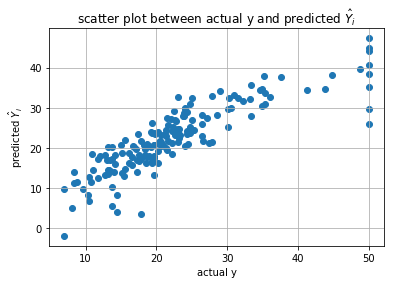

In [8]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
#scatter plot
plt.scatter(y_test,y_pred)
plt.grid(True)
plt.title('scatter plot between actual y and predicted $\hat{Y}_i$')
plt.xlabel('actual y')
plt.ylabel('predicted $\hat{Y}_i$')
plt.show()

(167, 1)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


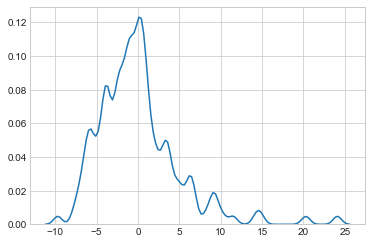

In [9]:
delta_y = y_test - y_pred;
print(delta_y.shape)
#print(delta_y)
delta_y = delta_y.reshape(167,)
print(type(delta_y))
# https://www.w3resource.com/python-exercises/pandas/python-pandas-data-series-exercise-6.php
new_series = pd.Series(delta_y)
print(type(new_series))

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(new_series), bw=0.5)
plt.show()

(167, 1)


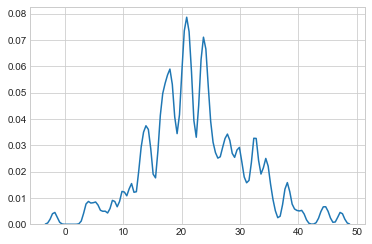

In [10]:
print(y_pred.shape)
y_pred = y_pred.reshape(167,)
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5)
plt.show()

## SGDRegressor, lr_rate=0.01

In [48]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
clf = SGDRegressor(alpha=0.01,learning_rate='constant')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print(mean_squared_error(y_train, clf.predict(X_train)))
print(clf.coef_)

w_sgd=clf.coef_.sum()/13
print(w_sgd)

20.032226813121735
[-1.1743603   0.89404713 -0.37520129  0.45907746 -1.54668819  2.81981342
 -0.56933781 -2.67409306  1.80267493 -1.43942877 -2.03771401  0.73898949
 -3.05149404]
-0.47336269606195747


C:\Users\samar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


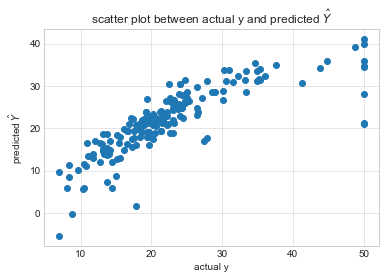

In [25]:
#scatter plot
plt.scatter(y_test,y_pred)
plt.title('scatter plot between actual y and predicted $\hat{Y}$')
plt.xlabel('actual y')
plt.ylabel('predicted $\hat{Y}$')
plt.grid(b=True, linewidth=0.5)
plt.show()

(167,)
(167,)
(167,)
(167,)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


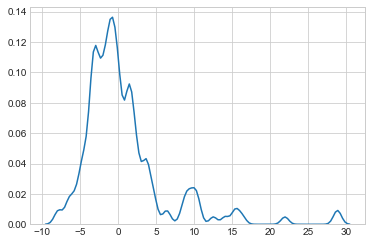

In [31]:
print(y_test.shape)
y_test = y_test.reshape(167,)
print(y_pred.shape)
print(y_test.shape)
delta_y = y_test - y_pred;

print(delta_y.shape)
#print(delta_y)
#delta_y = delta_y.reshape(167,)
print(type(delta_y))
# https://www.w3resource.com/python-exercises/pandas/python-pandas-data-series-exercise-6.php
new_series = pd.Series(delta_y)
print(type(new_series))

import seaborn as sns;#
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(new_series), bw=0.5)
plt.show()

(167,)


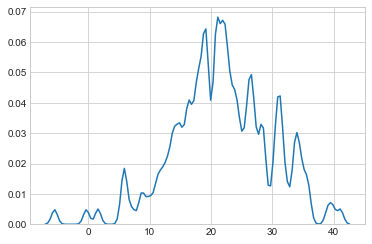

In [33]:
print(y_pred.shape)
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5)
plt.show()

# Conclusion

In [49]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["S.No.", "Approach", "iteration", "learning rate" , "Weight", "MSE" ]
x.add_row(["1", "Manually SGD", "2000", "0.01", "-0.4377087653246355", "24.05322529" ])
x.add_row(["2", "SGDRegressor", "Default", "0.01", "-0.47336269606195747", "20.46637434053527" ])

print(x)

+-------+--------------+-----------+---------------+----------------------+-------------------+
| S.No. |   Approach   | iteration | learning rate |        Weight        |        MSE        |
+-------+--------------+-----------+---------------+----------------------+-------------------+
|   1   | Manually SGD |    2000   |      0.01     | -0.4377087653246355  |    24.05322529    |
|   2   | SGDRegressor |  Default  |      0.01     | -0.47336269606195747 | 20.46637434053527 |
+-------+--------------+-----------+---------------+----------------------+-------------------+


# Summary

- divided the boston data into train and data
- divided the boston target into train and data
- preprocess the data by standarization between 0 and 1 
- made a function linear_reg_manual, to implement linear algorithm manually
- Called above linear_reg_manual funtion with epoch 2000, with learning rate 0.01, on training data, MSE = 24.05322529
- Called above linear_reg_manual funtion with epoch 2000, with learning rate 0.01, on test data. MSE = 24.05322529
- Drew plot between Y actual and Y predicted.
- Drew PCA plot for error (Actual Y - Predicted Y)
- Drew PCA plot for Predicted Y
- Through SGDRegressor algorithm, implemented Linear regression with learning rate 0.01, MSE 20.46637434053527
- Drew plot between Y actual and Y predicted.
- Drew PCA plot for error (Actual Y - Predicted Y)
- Drew PCA plot for Predicted Y